In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

ticker = "^GSPC"
data = yf.download(ticker, start="2015-01-01", end="2025-01-01")
data["Returns"] = 100 * data["Close"].pct_change().dropna()

returns = data["Returns"].dropna()

#ARCH(1)

arch_model_fit = arch_model(returns, vol="ARCH", p=1).fit(disp="off")

# Forecast 
arch_forecast = arch_model_fit.forecast(horizon=5)
arch_vol_forecast = np.sqrt(arch_forecast.variance.values[-1])


# 3.GARCH(1,1)
garch_model_fit = arch_model(returns, vol="GARCH", p=1, q=1).fit(disp="off")

# Forecast 5 days ahead
garch_forecast = garch_model_fit.forecast(horizon=5)
garch_vol_forecast = np.sqrt(garch_forecast.variance.values[-1])


# 4.Summary Outputs

print("\n================ ARCH(1) Summary ================\n")
print(arch_model_fit.summary())

print("\n================ GARCH(1,1) Summary ================\n")
print(garch_model_fit.summary())

print("\n================ 5-Day Volatility Forecasts ================\n")
print("ARCH σ forecast:", arch_vol_forecast)
print("GARCH σ forecast:", garch_vol_forecast)















C:\Users\knach\AppData\Local\Temp\ipykernel_19540\1974479497.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2015-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed



================ ARCH(1) Summary ================

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3522.80
Distribution:                  Normal   AIC:                           7051.59
Method:            Maximum Likelihood   BIC:                           7069.08
                                        No. Observations:                 2515
Date:                Sun, Nov 30 2025   Df Residuals:                     2514
Time:                        17:10:27   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu          

In [4]:
# ARCH and GARCH Forecast Plot

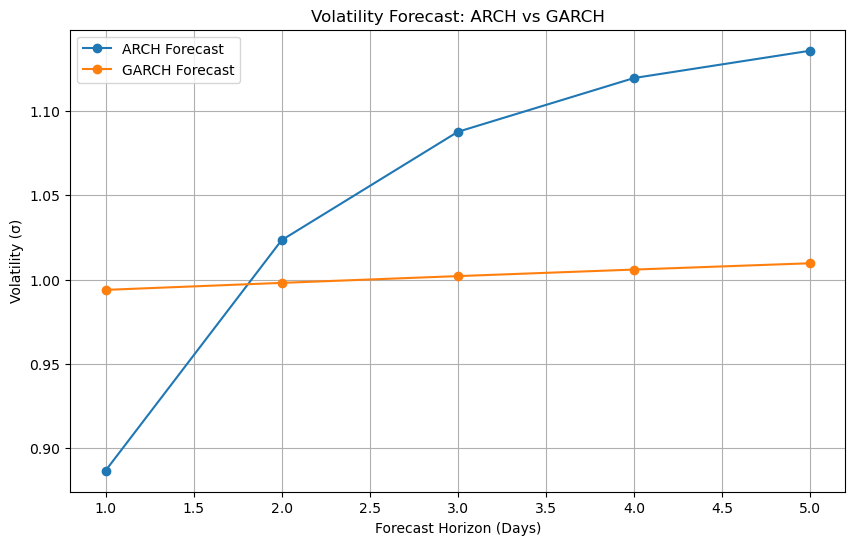

In [6]:


arch_forecast = np.array([0.88663084, 1.02343471, 1.08769937, 1.11961223, 1.13582807])
garch_forecast = np.array([0.99392465, 0.9980859, 1.00210186, 1.00597823, 1.00972042])

days = np.arange(1, len(arch_forecast) + 1)

plt.figure(figsize=(10, 6))

plt.plot(days, arch_forecast, marker='o', label="ARCH Forecast")
plt.plot(days, garch_forecast, marker='o', label="GARCH Forecast")

plt.title("Volatility Forecast: ARCH vs GARCH")
plt.xlabel("Forecast Horizon (Days)")
plt.ylabel("Volatility (σ)")
plt.grid(True)
plt.legend()

plt.show()
